In [41]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [42]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")   # <-- add this new one


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aqeel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Aqeel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [44]:
!pip install wordcloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aqeel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aqeel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aqeel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Aqeel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Dataset shape: (44898, 5)
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  


C:\Users\Aqeel\AppData\Local\Temp\ipykernel_9228\1333330452.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=data, palette="viridis")


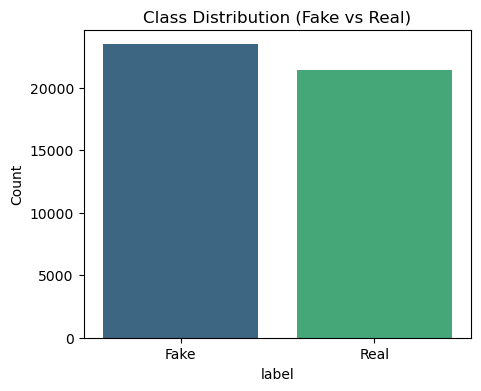

Number of Fake articles: 23481
Number of Real articles: 21417


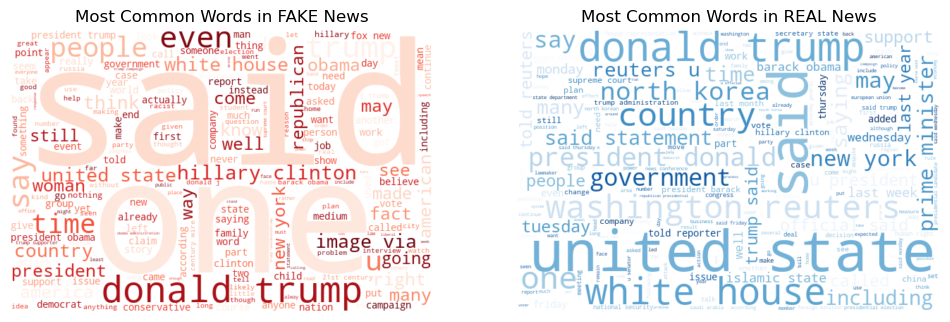

C:\Users\Aqeel\AppData\Local\Temp\ipykernel_9228\1333330452.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Word", data=fake_df, palette="Reds_r")
C:\Users\Aqeel\AppData\Local\Temp\ipykernel_9228\1333330452.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Word", data=real_df, palette="Blues_r")


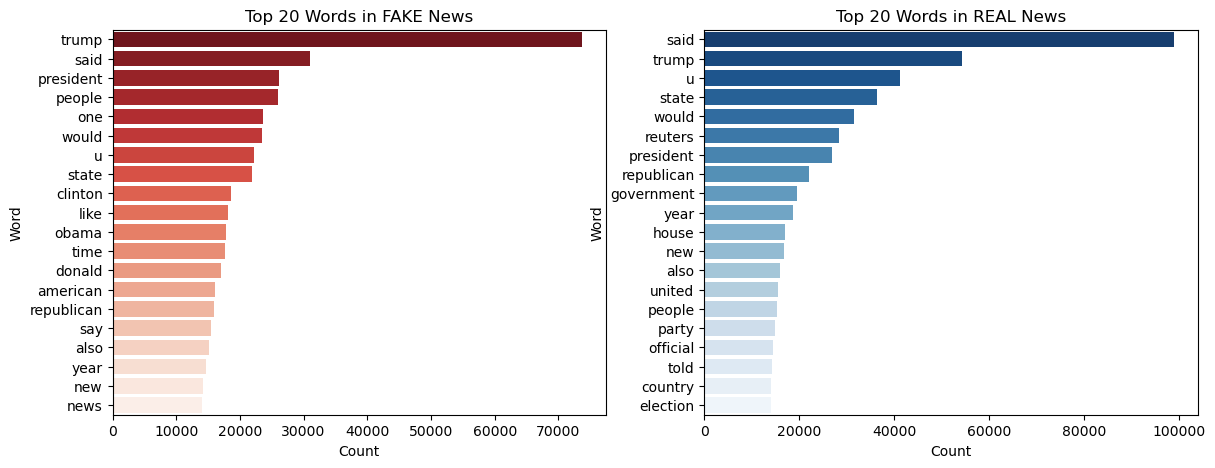

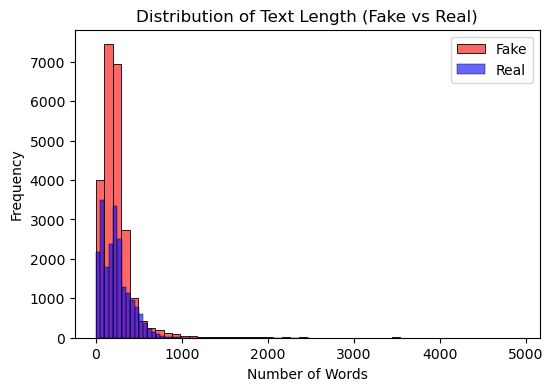

Average length of Fake news: 235.2574847749244
Average length of Real news: 231.1869542886492


C:\Users\Aqeel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

=== Model Performance Summary ===
                   Model  Accuracy  Precision    Recall        F1
0          Random Forest  0.998107   0.997179  0.998823  0.998000
1  Deep Learning (Keras)  0.992984   0.992004  0.993172  0.992587
2    Logistic Regression  0.987973   0.986369  0.988227  0.987297
3            Naive Bayes  0.931180   0.933158  0.920414  0.926743

Best Model: Random Forest


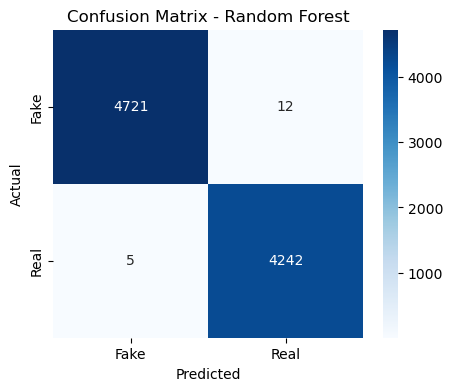


Custom Prediction Example:
Breaking: Government announces new policies to support renewable energy. → FAKE


In [45]:
# ==========================================
# 1. Imports
# ==========================================
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# ==========================================
# 2. Download NLTK resources
# ==========================================
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("punkt_tab")  # Fix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# ==========================================
# 3. Load Dataset
# ==========================================
df = pd.read_csv("Fake.csv")   # fake news
df2 = pd.read_csv("True.csv")  # real news

df["label"] = 0  # fake
df2["label"] = 1  # real

data = pd.concat([df, df2], axis=0).reset_index(drop=True)
print("Dataset shape:", data.shape)
print(data.head())

# ==========================================
# 4. Text Preprocessing
# ==========================================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

data["cleaned_text"] = data["text"].apply(clean_text)

# ==========================================
# 5. Exploratory Data Analysis (EDA)
# ==========================================

# --- Class Distribution ---
plt.figure(figsize=(5,4))
sns.countplot(x="label", data=data, palette="viridis")
plt.title("Class Distribution (Fake vs Real)")
plt.xticks([0,1], ["Fake", "Real"])
plt.ylabel("Count")
plt.show()

print("Number of Fake articles:", (data["label"]==0).sum())
print("Number of Real articles:", (data["label"]==1).sum())

# --- Word Clouds ---
fake_text = " ".join(data[data["label"]==0]["cleaned_text"])
real_text = " ".join(data[data["label"]==1]["cleaned_text"])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
wc_fake = WordCloud(width=600, height=400, background_color="white", colormap="Reds").generate(fake_text)
plt.imshow(wc_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in FAKE News")

plt.subplot(1,2,2)
wc_real = WordCloud(width=600, height=400, background_color="white", colormap="Blues").generate(real_text)
plt.imshow(wc_real, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in REAL News")
plt.show()

# --- Most Frequent Words ---
def get_top_words(texts, n=20):
    words = " ".join(texts).split()
    counter = Counter(words)
    return counter.most_common(n)

top_fake = get_top_words(data[data["label"]==0]["cleaned_text"], 20)
top_real = get_top_words(data[data["label"]==1]["cleaned_text"], 20)

fake_df = pd.DataFrame(top_fake, columns=["Word","Count"])
real_df = pd.DataFrame(top_real, columns=["Word","Count"])

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(x="Count", y="Word", data=fake_df, palette="Reds_r")
plt.title("Top 20 Words in FAKE News")

plt.subplot(1,2,2)
sns.barplot(x="Count", y="Word", data=real_df, palette="Blues_r")
plt.title("Top 20 Words in REAL News")
plt.show()

# --- Text Length Analysis ---
data["text_length"] = data["cleaned_text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(6,4))
sns.histplot(data[data["label"]==0]["text_length"], bins=50, color="red", label="Fake", alpha=0.6)
sns.histplot(data[data["label"]==1]["text_length"], bins=50, color="blue", label="Real", alpha=0.6)
plt.legend()
plt.title("Distribution of Text Length (Fake vs Real)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

print("Average length of Fake news:", data[data["label"]==0]["text_length"].mean())
print("Average length of Real news:", data[data["label"]==1]["text_length"].mean())

# ==========================================
# 6. Feature Engineering
# ==========================================
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data["cleaned_text"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==========================================
# 7. Machine Learning Models
# ==========================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

results = []
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    results.append([name, acc, prec, rec, f1])
    trained_models[name] = model

# ==========================================
# 8. Deep Learning Model
# ==========================================
dl_model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])
dl_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = dl_model.fit(
    X_train.toarray(), y_train,
    epochs=3, batch_size=64,
    validation_data=(X_test.toarray(), y_test),
    verbose=0
)

# Evaluate DL model
dl_preds = (dl_model.predict(X_test.toarray()) > 0.5).astype(int).flatten()
dl_acc = accuracy_score(y_test, dl_preds)
dl_prec = precision_score(y_test, dl_preds)
dl_rec = recall_score(y_test, dl_preds)
dl_f1 = f1_score(y_test, dl_preds)

results.append(["Deep Learning (Keras)", dl_acc, dl_prec, dl_rec, dl_f1])
trained_models["Deep Learning (Keras)"] = dl_model

# ==========================================
# 9. Results Summary + Confusion Matrix
# ==========================================
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("\n=== Model Performance Summary ===")
print(results_df)

best_model_name = results_df.iloc[0]["Model"]
print(f"\nBest Model: {best_model_name}")

# Confusion Matrix
if best_model_name == "Deep Learning (Keras)":
    best_preds = dl_preds
else:
    best_preds = trained_models[best_model_name].predict(X_test)

cm = confusion_matrix(y_test, best_preds)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================================
# 10. Custom News Prediction
# ==========================================
def predict_news(text, model, vectorizer):
    """
    Predict whether news is REAL or FAKE (works for sklearn & keras models).
    """
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    
    if isinstance(model, Sequential):  # Keras model
        pred = (model.predict(vec.toarray()) > 0.5).astype(int)[0][0]
    else:  # Sklearn model
        pred = model.predict(vec)[0]
    
    return "REAL" if pred == 1 else "FAKE"

# Example
example_news = "Breaking: Government announces new policies to support renewable energy."
print("\nCustom Prediction Example:")
print(example_news, "→", predict_news(example_news, trained_models[best_model_name], vectorizer))
